Flowchart
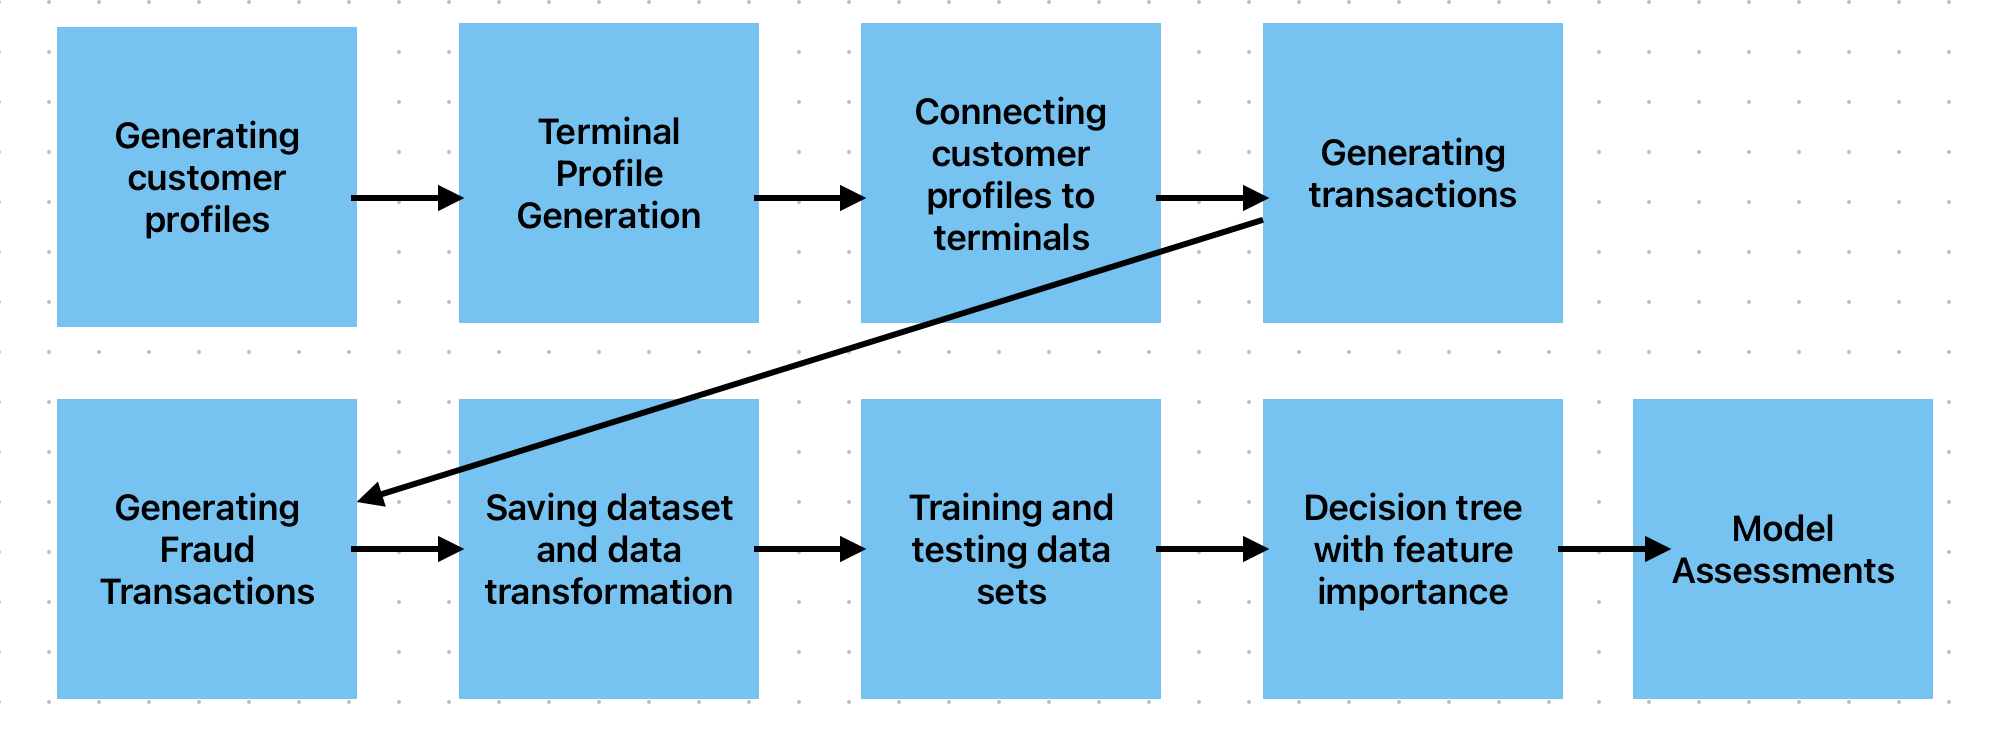

In [ ]:
#importing numpty so data can be turned into arrays or matrices which can then have mathematical functions performed on it (makes calculations and code easier) 
import numpy as np
#importing pandas so data can be formated into a dataframe which allows for better presentation and analysis
import pandas as pd

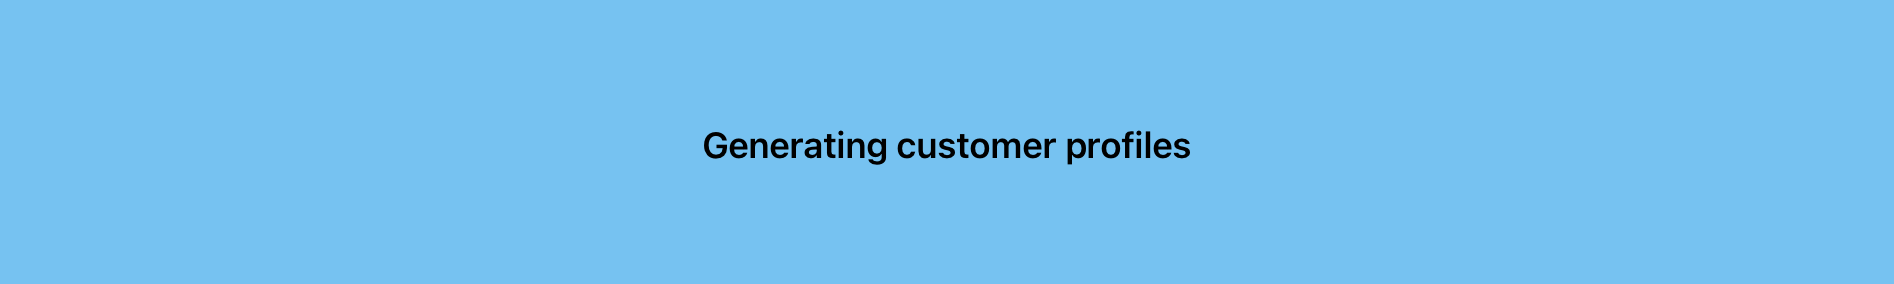

In [ ]:
#purpose: creates random customer profiles with random charaacterstics of location and transaction behavior and displays these random customers in a dataframe 
def generate_customer_profiles(n_customers, random_state = 0):

    #setting a default seed so the random number generation is always the same
    np.random.seed(random_state) 

    customer_id_properties = [] #empty list to store all customer id properties

    for customer in range(n_customers):
        x_customer_id = np.random.uniform(0,100) #generating random x coordinate for location
        y_customer_id = np.random.uniform(0,100) #generating random y coordinate for location

        mean_tx_amount = np.random.uniform(5,100) #generating random mean transaction amount
        std_tx_amount = mean_tx_amount/2 #st deviation of transaction amount 

        mean_tx_day = int(np.random.uniform(0,4)) #generating random mean transactions in a day

        #adding the information for one customer as a sublist to the list of all customer properties
        customer_id_properties.append([customer, x_customer_id, y_customer_id, mean_tx_amount, std_tx_amount, mean_tx_day])

    #turning each sublist into its own row in a data frame
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=["CUSTOMER_ID", "x_customer_id", "y_customer_id", "mean_tx_amount", "std_tx_amount", "mean_tx_day"])

    return customer_profiles_table







In [515]:
#purpose: calls the function to generate 5 random profiles displayed in a dataframe table 
n_customers = 5
customer_profiles_table = generate_customer_profiles(n_customers, random_state = 0)
customer_profiles_table


,CUSTOMER_ID,x_customer_id,y_customer_id,mean_tx_amount,std_tx_amount,mean_tx_day
0,0,54.881350,71.518937,62.262521,31.131260,2
1,1,42.365480,64.589411,46.570785,23.285393,3
2,2,96.366276,38.344152,80.213879,40.106939,2
3,3,56.804456,92.559664,11.748426,5.874213,0
4,4,2.021840,83.261985,78.924891,39.462446,3


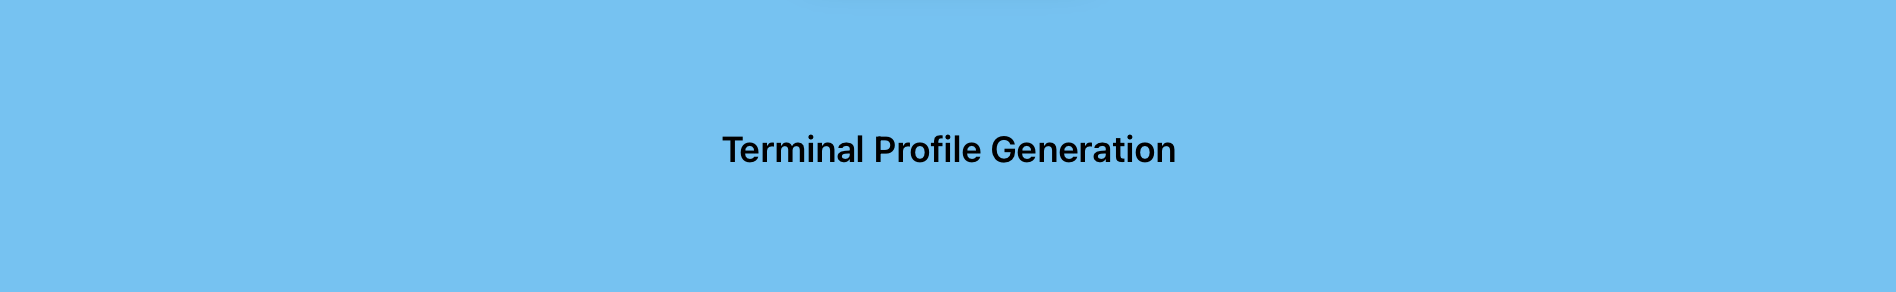

In [516]:
#purpose: creates random terminal profiles with random locations and displays these random terminals in a dataframe 
import numpy as np
import pandas as pd

def terminal_profile_generator(n_terminals, random_state=0):
    
    #setting a default seed so the random number generation is always the same
    np.random.seed(random_state)

    #empty list to store all terminal information
    terminals_list = []

    for terminal in range(n_terminals):
        x_terminal_id = np.random.uniform(0,100) #generating random x coordinate for terminal
        y_terminal_id = np.random.uniform(0,100) #generating random x coordinate for terminal

        #adding the information of one terminal as a sublist to the list of all terminal information
        terminals_list.append([terminal, x_terminal_id, y_terminal_id])

    #turning each sublist into its own row in a data frame
    terminal_profiles_table = pd.DataFrame(terminals_list, columns=["terminal_id", "x_terminal_id", "y_terminal_id"])

    return terminal_profiles_table

In [517]:
#purpose: calls the function to generate 5 random terminals displayed in a dataframe table 
n_terminals = 5
terminal_profiles_table = terminal_profile_generator(n_terminals, random_state = 0)
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


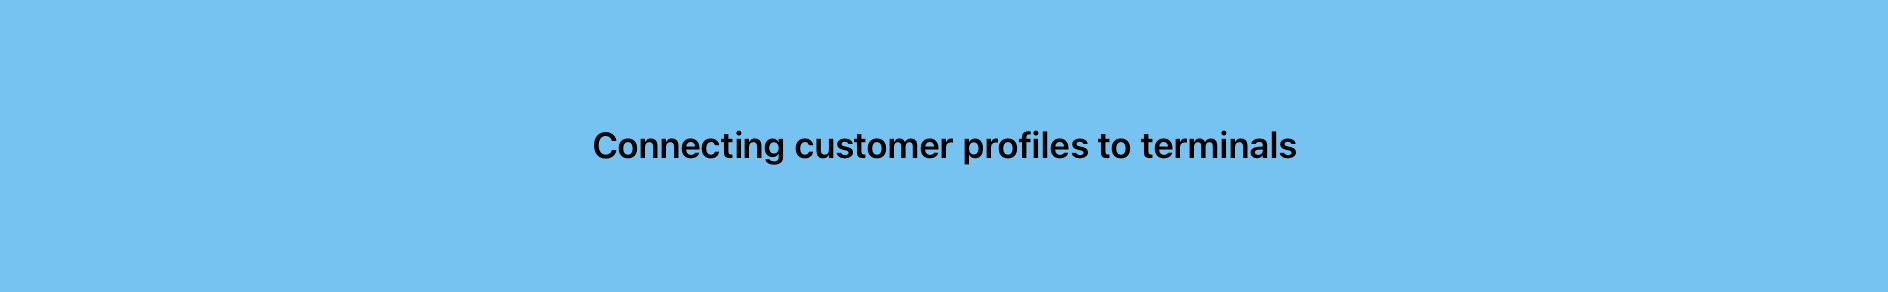

In [518]:
#purpose: identify terminals that are within a specific radius of a given customer's location 
import numpy as np
import pandas as pd

def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    #turning the location of a customer into a numPY array (easier to work with)
    customer_location = customer_profile[["x_customer_id", "y_customer_id"]].values.astype(float)
    
    #creates an array of all sqaured differences from the customer location for each terminal
    squared_distance = np.square(customer_location - x_y_terminals)

    #using euclidian distance formula to get the straight line distance between the customer locationa and each terminal
    straight_distance = np.sqrt(np.sum(squared_distance, axis=1))

    #finds the terminals that fit within the radius of the customer location
    allowed_terminals = list(np.where(straight_distance < r)[0])

    return allowed_terminals

In [519]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# And get the list of terminals within radius of 50 (whatever unit is used) for the last customer
list_terminals_in_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [520]:
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [521]:
%%capture
#purpose: graphs the location of terminals and customer location and shows all the terminals that are within the customer's specified radius
import matplotlib.pyplot as plt

#creates the figure
terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

#creates scatter points of the terminal locations 
ax.scatter(terminal_profiles_table.x_terminal_id.values, terminal_profiles_table.y_terminal_id.values, color="blue", label="Location of terminals")

#sets the customer to the last one (index starts at 0 so index of 4 is the 5th customer)
customer_id=4

#creates the scatter point of the customer's location
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, customer_profiles_table.iloc[customer_id].y_customer_id, color="red", label = "Location of the last customer")

#creates a legend to outside the upper leftof the figure
ax.legend(loc = "upper left", bbox_to_anchor=(1.05,1))

#creates a circle with the center being the customer's location and the radius of 50
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id, customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color="g", alpha= 0.2)

#adds the circle to the figure
ax.add_patch(circ)

#sets the fontsize of the figure
fontsize=15

#sets the title of the figure
ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")

#sets the range of the x and y axes
ax.set_xlim([0,100])
ax.set_ylim([0,100])

#sets the x and y axes labels
ax.set_xlabel("x_terminal_id", fontsize=fontsize)
ax.set_ylabel("y_terminal_id", fontsize=fontsize)

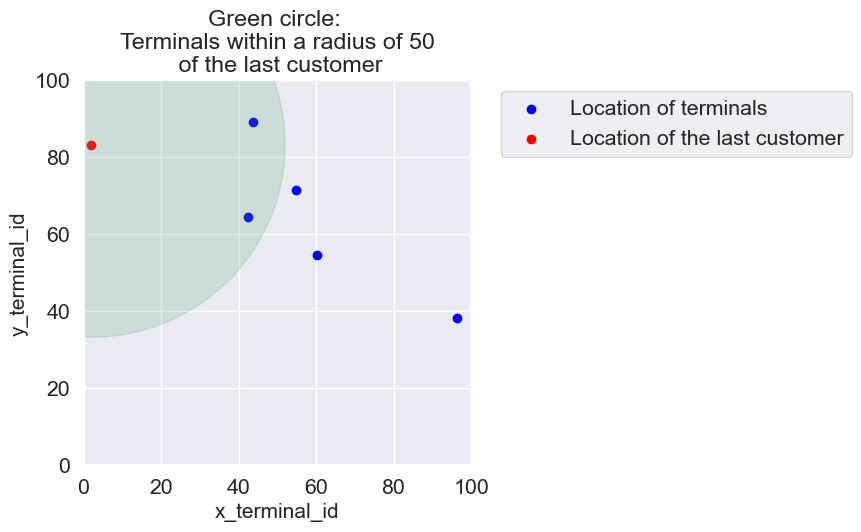

In [522]:
terminals_available_to_customer_fig

In [523]:
#adds the available terminals to the customer profiles table
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_tx_amount,std_tx_amount,mean_tx_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3,"[2, 3]"


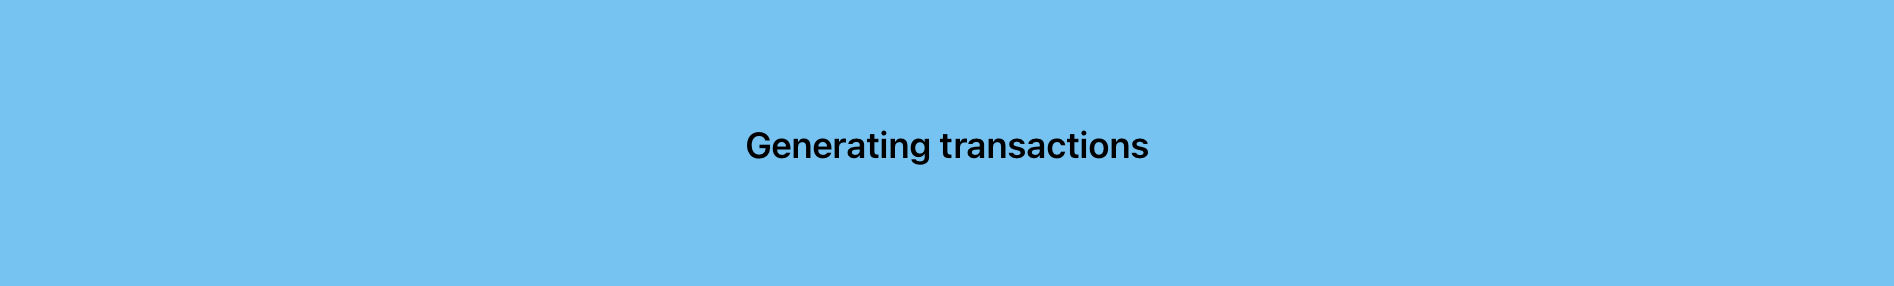

In [524]:
#purpose: generates transaction data for a given customer for each day over a set number of days and putting transaction data into a dataframe
import numpy as np
import pandas as pd
import random

def transaction_generation(customer_profile, start_date = "2018-04-01", nb_days = 10):

    #creates an empty list to hold customer transaction information 
    customer_transactions = []

    #setting a default seed so the random number generation is always the same
    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    for day in range(nb_days): #looping through each day
        #recalculating the number of transactions for each day by poisson distribution to get a more accurate model
        nb_tx = np.random.poisson(customer_profile.mean_tx_day)

        if nb_tx > 0: #if there are transactions per day
            for tx in range(nb_tx):
                time_tx = int(np.random.normal(86400/2, 20000)) #random generation of transaction time from normal distibution - the mean is total seconds in a day/2 and st dev is 20000 seconds

                if (time_tx > 0) and (time_tx < 86400): #if valid time
                    amount = np.random.normal(customer_profile.mean_tx_amount, customer_profile.std_tx_amount) #random generation of transaction amount from normal distibution - the mean and st dev derived from customer profile table

                    if amount < 0: #if amount is negative
                        amount = np.random.uniform(0, customer_profile.mean_tx_amount*2) #ensures the amount is positive while allowing for variation

                    amount = np.round(amount, decimals=2) #rounds the amount

                    if len(customer_profile.available_terminals)>0: #if there are available termins (within radius) for customer
                        terminal_id = random.choice(customer_profile.available_terminals) #randomly chooses a terminal

                        customer_transactions.append([time_tx + day*86400, day, customer_profile.CUSTOMER_ID, terminal_id, amount]) #adds transaction info as a sublist

    customer_transactions = pd.DataFrame(customer_transactions, columns=["TX_TIME_SECONDS", "TX_TIME_DAYS", "CUSTOMER_ID", "TERMINAL_ID", "TX_AMOUNT"]) #adds all the transactions as its own row in the dataframe

    if len(customer_transactions)>0: #if there are transactions
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date) #adds a column of the exact datetime for each transaction
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]
    
    return customer_transactions  
            

In [525]:
transaction_table_customer_0=transaction_generation(customer_profiles_table.iloc[0], 
                                                         start_date = "2018-04-01", 
                                                         nb_days = 5)
transaction_table_customer_0

#shows transactions of the first customer

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 22:22:31,0,3,31.84,80551,0
1,2018-04-01 17:16:41,0,3,57.55,62201,0
2,2018-04-01 11:25:35,0,0,75.04,41135,0
3,2018-04-02 14:41:26,0,2,80.29,139286,1
4,2018-04-02 10:59:28,0,3,106.16,125968,1
5,2018-04-02 09:55:10,0,3,70.83,122110,1
6,2018-04-02 06:39:44,0,2,74.00,110384,1
7,2018-04-03 10:39:17,0,3,109.41,211157,2
8,2018-04-03 10:08:58,0,2,63.74,209338,2
9,2018-04-03 20:07:34,0,1,110.05,245254,2


In [526]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : transaction_generation(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df
#generates transactions for all customers

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 22:22:31,0,3,31.84,80551,0
1,2018-04-01 17:16:41,0,3,57.55,62201,0
2,2018-04-01 11:25:35,0,0,75.04,41135,0
3,2018-04-02 14:41:26,0,2,80.29,139286,1
4,2018-04-02 10:59:28,0,3,106.16,125968,1
5,2018-04-02 09:55:10,0,3,70.83,122110,1
6,2018-04-02 06:39:44,0,2,74.00,110384,1
7,2018-04-03 10:39:17,0,3,109.41,211157,2
8,2018-04-03 10:08:58,0,2,63.74,209338,2
9,2018-04-03 20:07:34,0,1,110.05,245254,2


In [527]:
#purpose: generates customer profiles and terminals for specific number and number of days and then associates terminals within radius r of customer location to customer itself and generates transactions for the customer based on valid terminals for number of days specified
import time
import pandas as pd

def generate_dataset(n_customers=10000, n_terminals=100000, nb_days=90, start_date="2018-04-01", r=5):

    #sets the start time as the current time of when the line of code is written
    start_time = time.time()
    #creates a dataframe of random customer profiles 
    customer_profiles_table = generate_customer_profiles(n_customers, random_state=0)
    #subtracts current time with the start time of the code block - giving time to complete customer_profiles_table
    print("Time to generate customer profiles table: {:.2f}s".format(time.time() - start_time))

    #resets the start time to current time 
    start_time = time.time()
    #calls terminal profile generator function
    terminal_profiles_table = terminal_profile_generator(n_terminals, random_state=0)
    #subtracts current time with the start time of the code block - giving time to complete terminal_profiles_table
    print("Time to generate terminal profiles table: {:.2f}s".format(time.time() - start_time))

    #resets the start time to current time 
    start_time = time.time()
    #extracting the x and y location coordinates from the terminals - into an array
    x_y_terminals = terminal_profiles_table[["x_terminal_id", "y_terminal_id"]].values.astype(float)
    #adds new column of available terminals and loops over each row in the data frame to apply the function to get terminals within radius
    customer_profiles_table["available_terminals"] = customer_profiles_table.apply(lambda x: get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    #adds column to display number of available terminals to each customer by applying the len function to the availble_terminals column
    customer_profiles_table['nb_terminals'] = customer_profiles_table.available_terminals.apply(len)
    #prints the time taken to add the new terminal columns to the dataframe
    print("Time to associate terminals to customers: {:.2}s".format(time.time()-start_time))

    #resets the start time to current time 
    start_time = time.time()
    #seperates the customer profiles table into different groups and in those groups selects customers for transaction_generation function
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x: transaction_generation(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    #print the time to generate transactions
    print("Time to generate transactions: {:.2}s".format(time.time()-start_time))

    #sorts the transaction table based on transaction datetime 
    transactions_df=transactions_df.sort_values("TX_DATETIME")
    #resets the index and format of the fame
    transactions_df.reset_index(inplace=True,drop=True)
    #allows for the index column to be added to the dataframe
    transactions_df.reset_index(inplace=True)
    #index is renamed as Transaction_ID - inplace makes sure og datafram is used and a new one isn't made
    transactions_df.rename(columns={"index": "TRANSACTION_ID"}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)
    

In [528]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000, n_terminals = 10000, nb_days=183, start_date="2018-04-01", r=5)

Time to generate customer profiles table: 0.04s
Time to generate terminal profiles table: 0.02s
Time to associate terminals to customers: 0.46s
Time to generate transactions: 2.3e+01s


In [529]:
transactions_df.shape

(1311756, 7)

In [536]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:00:30,356,956,73.81,30,0
1,1,2018-04-01 00:00:31,596,1997,57.16,31,0
2,2,2018-04-01 00:01:59,3305,3173,66.21,119,0
3,3,2018-04-01 00:02:10,4961,4448,81.51,130,0
4,4,2018-04-01 00:07:56,2,1338,146.00,476,0
...,...,...,...,...,...,...,...
1311751,1311751,2018-09-30 23:57:12,2840,6838,94.91,15811032,182
1311752,1311752,2018-09-30 23:58:54,893,7516,13.29,15811134,182
1311753,1311753,2018-09-30 23:59:15,3376,9142,118.49,15811155,182
1311754,1311754,2018-09-30 23:59:54,3565,2416,5.77,15811194,182


In [537]:
%%capture
#purpose: plots distribution of transaction amounts (amount vs number of transactions) and times (time (days) vs number of transactions) from transactions dataframe 

#code plots distribution of transaction amounts and times 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#creates a figure - 1 row and 2 subplots next to each other with a size of 18 (width) x 4 (height) inches size 
distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize = (18, 4))

#of the transactions that occur within the first 10 days - samples 10,000 transaction amounts and puts into numpy array
amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values

#of the transactions that occur within the first 10 days - samples 10,000 transaction times and puts into numpy array
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

#from the seaborn(sns) library, creates a histogram. amount_val is the data being plotted, specifically in position 0 of the ax figure (subplot 1), with red bars and no kde (densite estimate) curve
sns.distplot(amount_val, ax=ax[0], color = 'r', hist = True, kde = False)

#sets the title of the first subplot of the figure - the histogram just made
ax[0].set_title('Distribution of transaction amounts', fontsize=14) 

#sets the range of the x axis based on min and max amount of transaction amounts
ax[0].set_xlim([min(amount_val), max(amount_val)])

#sets the title of the x and y axis
ax[0].set(xlabel="Amount", ylabel="Number of transactions")

#creates a new histogram in the subplot 2 position with the blue color. Plots the time_val amounts converted to days and bins is the number of value ranges - narrow hist bars
sns.distplot(time_val/86400, ax=ax[1], color='b', bins=100, hist=True, kde=False)

#sets the title of subplot 2 
ax[1].set_title("Distribution of transaction times", fontsize=14)

#sets the range of the x axis as time of transactions (converts from seconds to days)
ax[1].set_xlim([min(time_val//86400), max(time_val//86400)])

#sets the ticks of the x axis to be 10 units apart
ax[1].set_xticks(range(10))

#sets the x and y axis titles of subplot 2
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

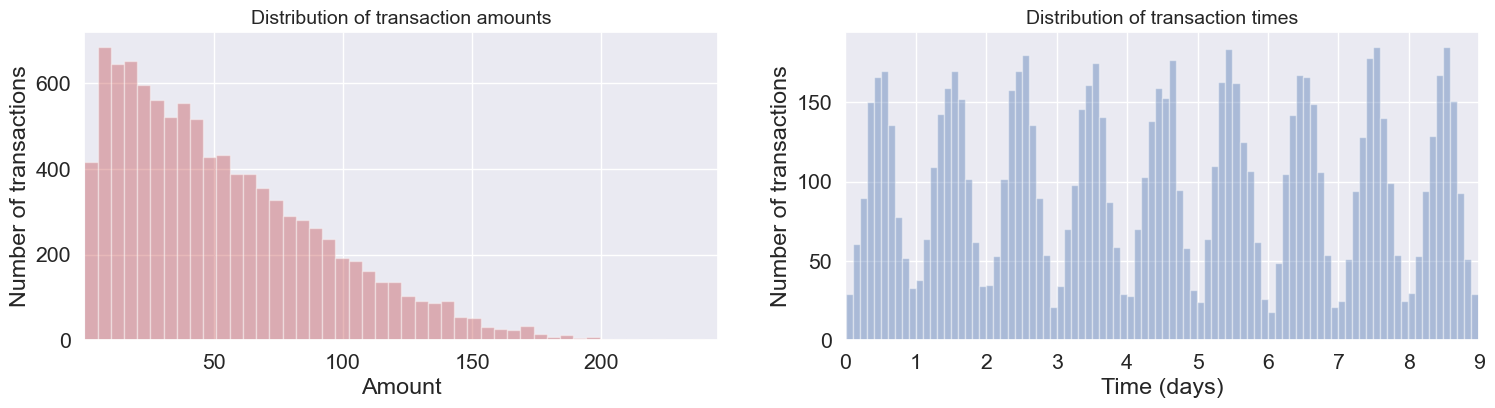

In [538]:
distribution_amount_times_fig

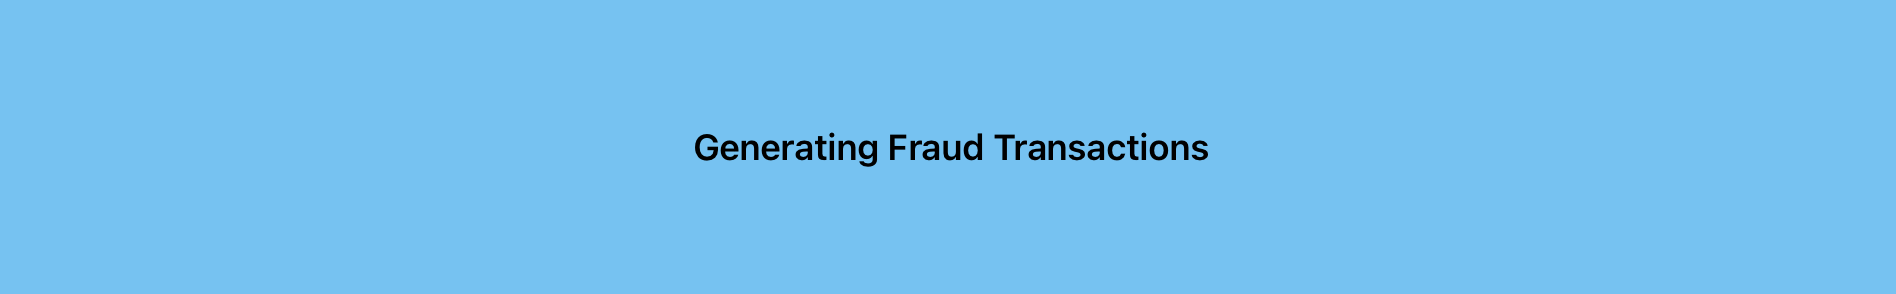

In [554]:
#purpose: creating fraud transactions based on three predefined scenarios 

from datetime import datetime, timedelta

def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):
    #defaults each transaction as real
    transactions_df['TX_FRAUD']=0 #says if its fraud or not - 0 is no and 1 is yes
    transactions_df['TX_FRAUD_SCENARIO']=0 #says what type of fraud scenario - 1,2, or 3 

    #marks transaction as fraud if the amount is over 220 - the threshold and lists as scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT > 220, 'TX_FRAUD'] = 1
    transactions_df.loc[transactions_df.TX_AMOUNT > 220, 'TX_FRAUD_SCENARIO'] = 1 
    
    #counts the number of scenario 1 fraud transactions
    nb_frauds_scenario_1 = transactions_df.TX_FRAUD.sum()

    #prints number of scenario 1 fraud
    print("Number of frauds from scenario 1: " + str(nb_frauds_scenario_1))

    #Scenario 2 - two random temrinals selected per day to be compromised and any transactions from those terminals are fraud

    #loops through each day 
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        #gets two random terminals
        compromised_terminals = terminal_profiles_table.terminal_id.sample(n=2, random_state=day)

        #selects the transactions that are completed at the compromised terminals in the 28 day window
        compromised_transactions = transactions_df[(transactions_df.TX_TIME_DAYS >= day) & (transactions_df.TX_TIME_DAYS < day + 28) & (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        #lists the new compromised transactions as fraud in the transactions data frame
        transactions_df.loc[compromised_transactions.index, "TX_FRAUD"]=1
        #lists the new compromised transactions at fraud scenario 2 in the transactions data frame
        transactions_df.loc[compromised_transactions.index, "TX_FRAUD_SCENARIO"]=2

    #counts the number of fraud scenario 2 by getting the sum of fraud transactions and subtracting number of scenario 1 fraud
    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1

    #prints number of fraud scenario 2
    print("Number of frauds from scenario 2: " +str(nb_frauds_scenario_2))

    #Scenario 3
    #loops through each day
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        #selects 3 random customers that are hacked and have fraud transactions - the randome_state=day ensures the same 3 customers are chosen for that day when restested
        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        #selects transactions of the next 14 days of the hacked customers
        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) & (transactions_df.TX_TIME_DAYS < day+14) & (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        #gets the number of compromised transactions by getting the number of rows in the compromised transactions dataframe
        nb_compromised_transactions=len(compromised_transactions)

        #ensures the random index selected is the same everytime the specific day is retested
        random.seed(day)

        #turns the index of fraud transactions into a numpy array and then a list and then randomly selects 1/3 of fraud transactions 
        index_frauds = random.sample(list(compromised_transactions.index.values), k=int(nb_compromised_transactions/3))

        #the transaction amount of the random selected fraud transactions is multiplied by 5
        transactions_df.loc[index_frauds, "TX_AMOUNT"]=transactions_df.loc[index_frauds, "TX_AMOUNT"]*5

        #marks the randomly selected fraud transactions as fraud in the dataframe
        transactions_df.loc[index_frauds, "TX_FRAUD"]=1

        #marks the randomly selected fraud transactions as fraud scenario 3 in the dataframe
        transactions_df.loc[index_frauds, "TX_FRAUD_SCENARIO"]=3

    #counts the number of fraud scenario 3 by getting the sum of fraud transactions and subtracting number of scenario 1 and scenario 3 fraud
    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1

    #prints number of fraud scenario 3
    print("Number of frauds from scenario 3: " + str(nb_frauds_scenario_3))

    #returns transaction dataframe
    return transactions_df
        


        
        
    
        
        

    
    

In [555]:
#gets the number of frauds
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of frauds from scenario 1: 2400
Number of frauds from scenario 2: 6889
Number of frauds from scenario 3: 1726
CPU times: user 29.7 s, sys: 348 ms, total: 30 s
Wall time: 30.6 s


In [556]:
#Percentage of fraud transactions
transactions_df.TX_FRAUD.mean()

0.008397140931697663

In [557]:
#numbers of fraud transactions
transactions_df.TX_FRAUD.sum()

11015

In [558]:
#shows first 5 rows of transaction dataframe - for preview
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:30,356,956,73.81,30,0,0,0
1,1,2018-04-01 00:00:31,596,1997,57.16,31,0,0,0
2,2,2018-04-01 00:01:59,3305,3173,66.21,119,0,0,0
3,3,2018-04-01 00:02:10,4961,4448,81.51,130,0,0,0
4,4,2018-04-01 00:07:56,2,1338,146.00,476,0,0,0


In [559]:
#filters the data frame of the transactions that are scenario 1 and then returns the "shape" - the number of rows that are scenario 1 and how many columns it has (standard 10)
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(713, 9)

In [560]:
#filters the data frame of the transactions that are scenario 2 and then returns the "shape" - the number of rows that are scenario 2 and how many columns it has (standard 9)
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(6880, 9)

In [561]:
#filters the data frame of the transactions that are scenario 3 and then returns the "shape" - the number of rows that are scenario 3 and how many columns it has (standard 9)
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(3422, 9)

In [562]:
#figure to show all the different types of transactions and the change per day

def get_stats(transactions_df):

    #groups the transactions by its days and then counts the amount of "customer id" for each group, representing amount of transactions per day - returns a column
    #number of transactions per day
    nb_tx_per_day = transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()

    #groups the transactions by its days and then counts the sum of "fraud transactions" for each group, representing amount of fraud transactions per day since 0 is not fraud and 1 is fraud
    #number of fraud transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()

    #filters the transactions dataframe to only include fraud transactions and then groups the transactions by days and finds how many different customers had fraud transactions per day
    #number of fraud ppl per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

#turns the tuple into these three variables
(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

#gives the number of days
n_days=len(nb_tx_per_day)

#creates dataframe where three series are combined into one column - /50 is done to make the range of the graph smaller
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})

#adds 'stat_type' column to tx_stats dataframe and each row is just the type of fraud - the multiplication is so each row automatically has the designated fraud category it belongs to
tx_stats['stat_type'] = ["nb_tx_per_day"]*n_days + ["nb_fraud_per_day"]*n_days + ["nb_fraudcard_per_day"]*n_days
#resets the index to get the original index into a column
tx_stats=tx_stats.reset_index()

In [563]:
%%capture

#purpose: create a line plot that shows the total number of transactions, number of fraud transactions, and number of fraud/compormised customers per day 

#sets the figure 

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

#gets current figure object
fraud_and_transactions_stats_fig = plt.gcf()

#figure size
fraud_and_transactions_stats_fig.set_size_inches(15,8)

#creates lineplot with x and y axis set, the data frame that is plotted, the differentiation of lines, the order of hue levels, disabled legend
sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day", "nb_fraud_per_day", "nb_fraudcard_per_day"], legend=False)

sns_plot.set_title("Total transactions, and the number of fraudulent transactions \n and number of compromised cards per day", fontsize=20)

sns_plot.set(xlabel="Number of days since beginning of data generation", ylabel="Number")
sns_plot.set_ylim([0, 300])

labels_legend = ["# transactions per day (/50)", "# fraud txs per day", "#fraud cards per day"]
sns_plot.legend(loc="upper left", labels=labels_legend, bbox_to_anchor=(1.05,1), fontsize=15)

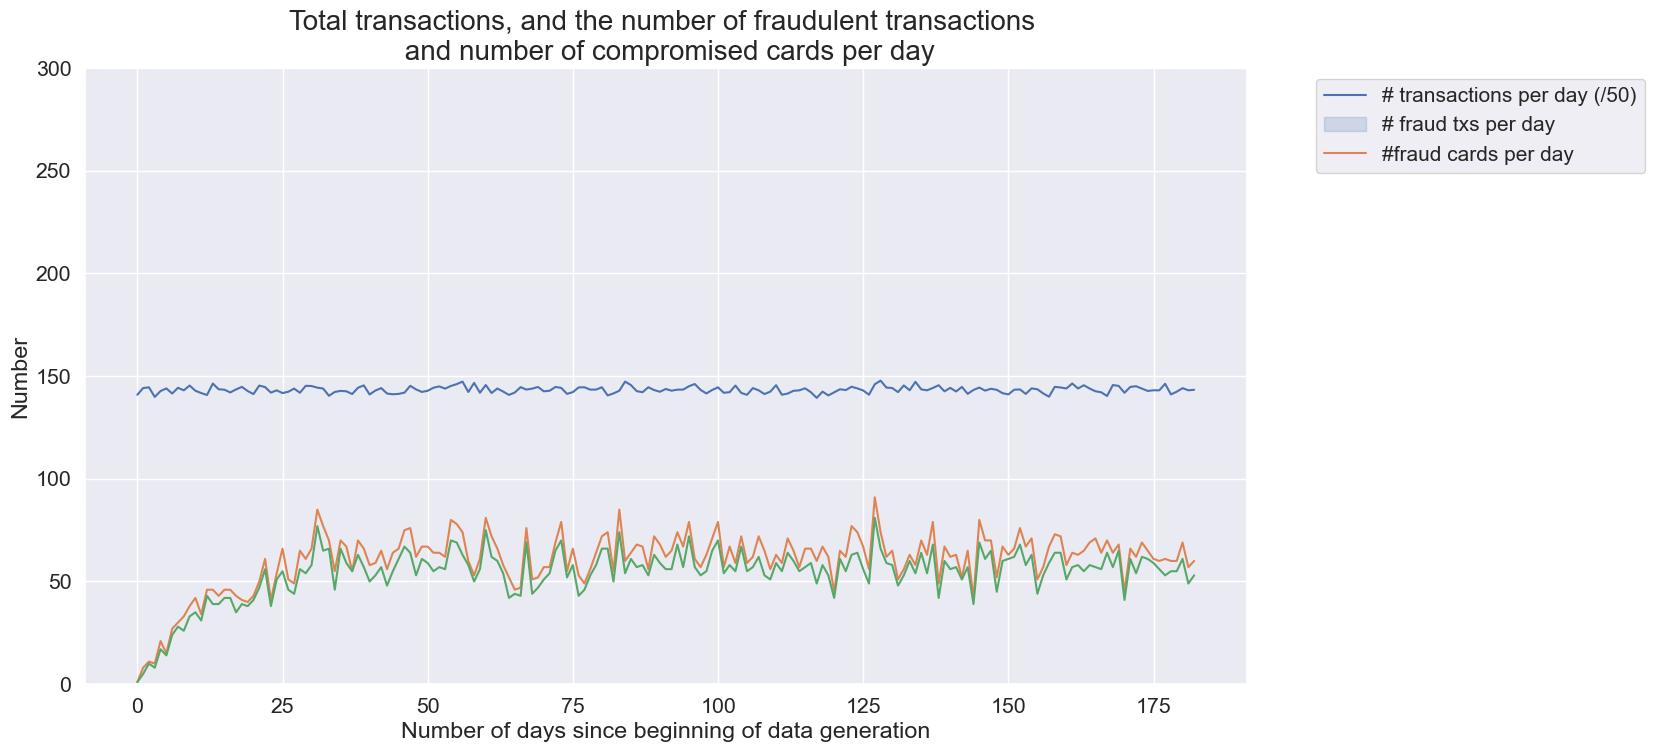

In [564]:
fraud_and_transactions_stats_fig

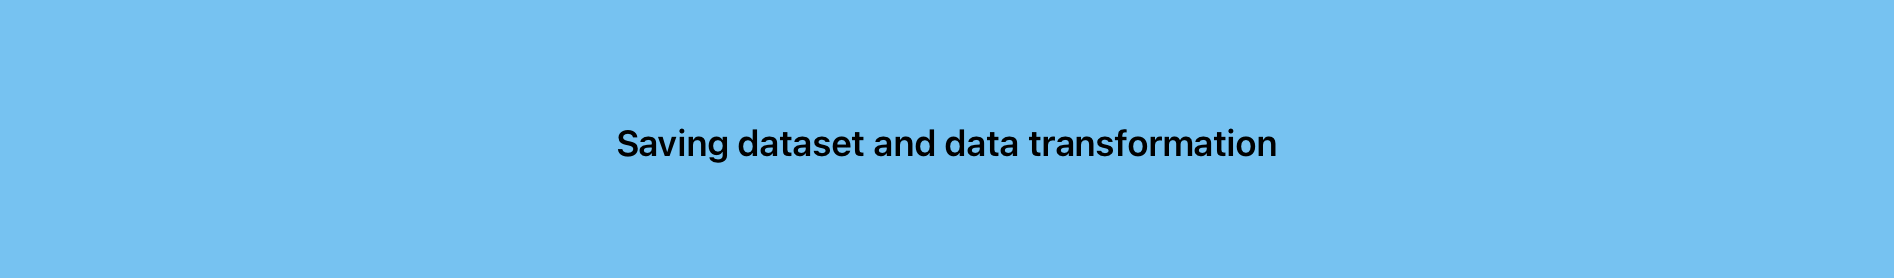

In [571]:
#purpose: splits transaction dataframe into daily subsets for better day to day analyzation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [508]:
import sklearn
print(sklearn.__version__)

1.5.0


In [572]:
#Ensures notebook has necessary functions for analysis
# Initialization: Load shared functions and simulated data 

# Load shared functions

import torch
import torch.nn.functional as F
import xgboost
import graphviz
import imblearn
import warnings

!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-raw"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0  34215      0  0:00:01  0:00:01 --:--:-- 34211


<Figure size 640x480 with 0 Axes>

In [573]:
#purpose: reads pickle files and filters the files based on if it matches the specified date range and combines the files into one 
import os
import pandas as pd
from datetime import datetime

def read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE):
    files = os.listdir(DIR_INPUT)
    files = [f for f in files if f.endswith('.pkl')]
    
    date_format = "%Y-%m-%d"
    begin_datetime = datetime.strptime(BEGIN_DATE, date_format)
    end_datetime = datetime.strptime(END_DATE, date_format)
    
    frames = []
    for f in files:
        file_date_str = f.split('.')[0]  # Assuming file names are like YYYY-MM-DD.pkl
        file_date = datetime.strptime(file_date_str, date_format)
        
        if begin_datetime <= file_date <= end_datetime:
            file_path = os.path.join(DIR_INPUT, f)
            frames.append(pd.read_pickle(file_path))
            print(f"Added file {f} to frames.")
    
    if len(frames) == 0:
        raise ValueError(f"No data files found between {BEGIN_DATE} and {END_DATE}")
    
    combined_frame = pd.concat(frames)
    return combined_frame

# Example usage to load transactions between April 1, 2018, and July 1, 2024
DIR_INPUT = './simulated-data-raw/'
BEGIN_DATE = "2018-04-01"
END_DATE = "2024-07-01"

print("Loading files...")
%time transactions_df = read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df), transactions_df['TX_FRAUD'].sum()))


Loading files...
Added file 2024-04-16.pkl to frames.
Added file 2024-04-02.pkl to frames.
Added file 2024-03-23.pkl to frames.
Added file 2018-05-04.pkl to frames.
Added file 2018-05-10.pkl to frames.
Added file 2018-07-01.pkl to frames.
Added file 2018-07-15.pkl to frames.
Added file 2018-09-10.pkl to frames.
Added file 2018-07-29.pkl to frames.
Added file 2018-09-04.pkl to frames.
Added file 2024-06-13.pkl to frames.
Added file 2024-06-07.pkl to frames.
Added file 2024-01-26.pkl to frames.
Added file 2024-01-27.pkl to frames.
Added file 2024-06-06.pkl to frames.
Added file 2024-06-12.pkl to frames.
Added file 2018-09-05.pkl to frames.
Added file 2018-07-28.pkl to frames.
Added file 2018-09-11.pkl to frames.
Added file 2018-07-14.pkl to frames.
Added file 2018-05-11.pkl to frames.
Added file 2018-05-05.pkl to frames.
Added file 2024-03-22.pkl to frames.
Added file 2024-04-03.pkl to frames.
Added file 2024-04-17.pkl to frames.
Added file 2024-03-08.pkl to frames.
Added file 2024-04-01

In [574]:
#makes a directory called "simulated-data-raw" by cloning a github repository
import os

# Check if the directory 'simulated-data-raw' exists
if not os.path.exists("simulated-data-raw"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw
else:
    print("simulated-data-raw directory already exists.")

# Check the 'data' directory inside 'simulated-data-raw' for .pkl files
data_dir = './simulated-data-raw/data/'
files = os.listdir(data_dir)
print("Files in data directory:", files)


simulated-data-raw directory already exists.
Files in data directory: ['simulated-data-raw']


In [575]:
#purpose: checks the contents of the "simulated data raw" directory
import os

# Check the contents of 'simulated-data-raw'
simulated_data_raw_dir = './simulated-data-raw/'

if os.path.exists(simulated_data_raw_dir):
    files = os.listdir(simulated_data_raw_dir)
    print("Files in simulated-data-raw directory:", files)
else:
    print("Directory simulated-data-raw does not exist. Please check your setup.")


Files in simulated-data-raw directory: ['2024-04-16.pkl', '2024-04-02.pkl', '2024-03-23.pkl', '2018-05-04.pkl', '2018-05-10.pkl', '2018-07-01.pkl', '2018-07-15.pkl', '2018-09-10.pkl', '2018-07-29.pkl', '2018-09-04.pkl', '2024-06-13.pkl', '2024-06-07.pkl', '2024-01-26.pkl', '2024-01-27.pkl', '2024-06-06.pkl', '2024-06-12.pkl', '2018-09-05.pkl', '2018-07-28.pkl', '2018-09-11.pkl', '2018-07-14.pkl', '2018-05-11.pkl', '2018-05-05.pkl', '2024-03-22.pkl', '2024-04-03.pkl', '2024-04-17.pkl', '2024-03-08.pkl', '2024-04-01.pkl', '2024-04-15.pkl', '2024-04-29.pkl', '2024-03-20.pkl', '2018-05-13.pkl', '2018-05-07.pkl', '2018-07-16.pkl', '2018-07-02.pkl', '2018-09-07.pkl', '2018-09-13.pkl', '2024-06-04.pkl', '2024-01-19.pkl', '2024-06-10.pkl', '2024-01-31.pkl', '2024-01-25.pkl', '2024-01-24.pkl', '2024-01-30.pkl', '2024-01-18.pkl', '2024-06-11.pkl', '2024-06-05.pkl', '2018-09-12.pkl', '2018-09-06.pkl', '2018-07-03.pkl', '2018-07-17.pkl', '2018-05-06.pkl', '2018-05-12.pkl', '2024-04-28.pkl', '2024-

In [576]:
#purpose: loads transaction data from the "simulated data raw" directory between a specific date range
DIR_INPUT = './simulated-data-raw/' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2024-07-01"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
Added file 2024-04-16.pkl to frames.
Added file 2024-04-02.pkl to frames.
Added file 2024-03-23.pkl to frames.
Added file 2018-05-04.pkl to frames.
Added file 2018-05-10.pkl to frames.
Added file 2018-07-01.pkl to frames.
Added file 2018-07-15.pkl to frames.
Added file 2018-09-10.pkl to frames.
Added file 2018-07-29.pkl to frames.
Added file 2018-09-04.pkl to frames.
Added file 2024-06-13.pkl to frames.
Added file 2024-06-07.pkl to frames.
Added file 2024-01-26.pkl to frames.
Added file 2024-01-27.pkl to frames.
Added file 2024-06-06.pkl to frames.
Added file 2024-06-12.pkl to frames.
Added file 2018-09-05.pkl to frames.
Added file 2018-07-28.pkl to frames.
Added file 2018-09-11.pkl to frames.
Added file 2018-07-14.pkl to frames.
Added file 2018-05-11.pkl to frames.
Added file 2018-05-05.pkl to frames.
Added file 2024-03-22.pkl to frames.
Added file 2024-04-03.pkl to frames.
Added file 2024-04-17.pkl to frames.
Added file 2024-03-08.pkl to frames.
Added file 2024-04-01.pkl 

In [577]:
#purpose: determines whether a given datetime is a weekday 

def is_weekend(tx_datetime):
    #transforms date into weekday(0 Mon,1 Tues, 2 Wed, 3 Thurs, 4 Fri, 5 Sat, 6 Sun)
    weekday = tx_datetime.weekday()

    #Binary: 0 weekday, 1 weekend
    is_weekend = weekday>=5

    return int(is_weekend)

In [578]:
#purpose: applies weekday or not transformation to dataframe 
%time transactions_df['TX_DURING_WEEKEND']=transactions_df.TX_DATETIME.apply(is_weekend)

CPU times: user 2.66 s, sys: 223 ms, total: 2.88 s
Wall time: 3.01 s


In [579]:
#purpose: determines whether a given datetime is at night 
def is_night(tx_datetime):
    #hour of transaction
    tx_hour = tx_datetime.hour

    #Binary: hour less than 6 is 1, hour over 6 is 0
    #accounts for time before sunrise
    #can be fixed to account for after sunset as well
    is_night = tx_hour <=6

    return int(is_night)
    

In [580]:
#applies transformation to dataframe 
%time transactions_df['TX_DURING_NIGHT']=transactions_df.TX_DATETIME.apply(is_night)

CPU times: user 2.14 s, sys: 219 ms, total: 2.36 s
Wall time: 2.45 s


In [581]:
transactions_df[transactions_df.TX_TIME_DAYS>=30]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
759702,759702,2018-07-16 00:03:28,169,5254,18.54,9158608,106,0,0,NaN,0,1
759703,759703,2018-07-16 00:04:37,4447,9484,20.79,9158677,106,0,0,NaN,0,1
759704,759704,2018-07-16 00:05:10,542,6157,22.09,9158710,106,0,0,NaN,0,1
759705,759705,2018-07-16 00:06:18,2531,3048,77.31,9158778,106,0,0,NaN,0,1
759706,759706,2018-07-16 00:06:57,3595,1344,14.86,9158817,106,0,0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
472773,472773,2018-06-05 23:57:07,4434,4117,81.88,5702227,65,0,0,NaN,0,0
472774,472774,2018-06-05 23:57:43,1590,6447,155.40,5702263,65,0,0,NaN,0,0
472775,472775,2018-06-05 23:58:15,4100,6191,96.02,5702295,65,0,0,NaN,0,0
472776,472776,2018-06-05 23:58:40,531,8536,19.26,5702320,65,0,0,NaN,0,0


In [582]:
#purpose: sorts the dataframe of customer transaction chronologically and then computes the sum, number, and avg transaction amount of different time windows
def get_customer_spending_behavior_features(customer_transactions, window_size_in_days=[1,7,30]):

    #orders transactions chronologically
    customer_transactions=customer_transactions.sort_values('TX_DATETIME')

    #transaction date and time is set as index
    customer_transactions.index=customer_transactions.TX_DATETIME

    #For each window size - 1,7,30 days
    for window_size in window_size_in_days:

        #Compute the sum of the transaction amounts for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()

        #Counts the number of transactions for the given window size
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()

        #avg tx amount for a given window size
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW

        #creates a new column in customer_transactions for each window size for the number of transactions and avg amount 
        customer_transactions['CUSTOMER_ID_NB_TX' + str(window_size) + 'DAY_WINDOW']= list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_' + str(window_size) + 'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)

    #sets the index as transaction id
    customer_transactions.index=customer_transactions.TRANSACTION_ID

    return customer_transactions
        

        

In [583]:
#getting the spending behavior of the first customer
spending_behavior_customer_0=get_customer_spending_behavior_features(transactions_df[transactions_df.CUSTOMER_ID==0])
spending_behavior_customer_0

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,,
3194,3194,2018-04-01 11:25:35,0,761,75.04,41135,0,0,0,NaN,1,0,1.0,75.040000,1.0,75.040000,1.0,75.040000
3194,3194,2018-04-01 11:25:35,0,761,75.04,41135,0,0,0,NaN,1,0,2.0,75.040000,2.0,75.040000,2.0,75.040000
5935,5935,2018-04-01 17:16:41,0,7583,57.55,62201,0,0,0,NaN,1,0,3.0,69.210000,3.0,69.210000,3.0,69.210000
5935,5935,2018-04-01 17:16:41,0,7583,57.55,62201,0,0,0,NaN,1,0,4.0,66.295000,4.0,66.295000,4.0,66.295000
6925,6925,2018-04-01 22:22:31,0,6958,31.84,80551,0,0,0,NaN,1,0,5.0,59.404000,5.0,59.404000,5.0,59.404000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301831,1301831,2018-09-29 13:32:07,0,4070,62.04,15687127,181,0,0,NaN,1,0,8.0,67.797500,26.0,58.620769,124.0,67.296935
1307016,1307016,2018-09-30 09:46:14,0,1911,52.40,15759974,182,0,0,NaN,1,0,3.0,58.826667,27.0,58.390370,123.0,67.103089
1307016,1307016,2018-09-30 09:46:14,0,1911,52.40,15759974,182,0,0,NaN,1,0,4.0,57.220000,28.0,58.176429,124.0,66.984516


In [584]:
#applies window method to all customers
%time transactions_df=transactions_df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behavior_features(x, window_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)

CPU times: user 5.87 s, sys: 409 ms, total: 6.28 s
Wall time: 6.42 s


In [585]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2018-04-01 00:00:30,356,956,73.81,30,0,0,0,NaN,1,1,1.0,73.810000,1.0,73.810000,1.0,73.810000
1,0,2018-04-01 00:00:30,356,956,73.81,30,0,0,0,NaN,1,1,2.0,73.810000,2.0,73.810000,2.0,73.810000
2,1,2018-04-01 00:00:31,596,1997,57.16,31,0,0,0,NaN,1,1,1.0,57.160000,1.0,57.160000,1.0,57.160000
3,1,2018-04-01 00:00:31,596,1997,57.16,31,0,0,0,NaN,1,1,2.0,57.160000,2.0,57.160000,2.0,57.160000
4,2,2018-04-01 00:01:59,3305,3173,66.21,119,0,0,0,NaN,1,1,1.0,66.210000,1.0,66.210000,1.0,66.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623507,1311753,2018-09-30 23:59:15,3376,9142,118.49,15811155,182,0,0,NaN,1,0,6.0,66.026667,16.0,46.746250,104.0,52.934038
2623508,1311754,2018-09-30 23:59:54,3565,2416,5.77,15811194,182,0,0,NaN,1,0,8.0,6.677500,38.0,9.320000,164.0,9.192561
2623509,1311754,2018-09-30 23:59:54,3565,2416,5.77,15811194,182,0,0,NaN,1,0,7.0,6.807143,37.0,9.415946,163.0,9.213558
2623510,1311755,2018-09-30 23:59:57,741,1640,16.22,15811197,182,0,0,NaN,1,0,3.0,12.680000,57.0,11.068772,175.0,10.528686


In [586]:
#extracts a risk score for the avg number of fraud transactions at a terminal id over a time period
#parameters: terminal transactions lists all the transactions, delay_period is the buffer time for rolling window calculations, window size is the time period for the calculations, feature is the name of new columns in DataFrame 
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"):
    #sorts transactions by Datetime
    terminal_transactions = terminal_transactions.sort_values("TX_DATETIME")
    #sets the index as datetime 
    terminal_transactions.index = terminal_transactions.TX_DATETIME

    #calculates sum of fraud transactions during delay period
    NB_FRAUD_DELAY = terminal_transactions['TX_FRAUD'].rolling(str(delay_period) + 'd').sum()
    #counts the number of transactions during delay period  
    NB_TX_DELAY = terminal_transactions['TX_FRAUD'].rolling(str(delay_period) + 'd').count()

    #loops through window size
    for window_size in windows_size_in_days:
        #calculates number of fraud transactions for delay period and window size
        NB_FRAUD_DELAY_WINDOW = terminal_transactions['TX_FRAUD'].rolling(str(delay_period + window_size) +'d').sum()
        #counts the number of transactions for the delay perio and window size
        NB_TX_DELAY_WINDOW = terminal_transactions['TX_FRAUD'].rolling(str(delay_period + window_size) + 'd').count()

        #gets the number of fraud transactions of just the window size
        NB_FRAUD_WINDOW = NB_FRAUD_DELAY_WINDOW - NB_FRAUD_DELAY
        #gets the number of transactions of just hte winodw size
        NB_TX_WINDOW = NB_TX_DELAY_WINDOW - NB_TX_DELAY

        #calculates how many transactions were fraud out of the total transactions - aka the risk rate 
        RISK_WINDOW = NB_FRAUD_WINDOW/NB_TX_WINDOW

        #creates a new column in dataframe to list the number of transactions of that window size
        terminal_transactions[feature + '_NB_TX_' + str(window_size) + 'DAY_WINDOW']=list(NB_TX_WINDOW)
        #creates a new column in dataframe to list the risk probability of a false transactions
        terminal_transactions[feature + '_RISK_' + str(window_size) + 'DAY_WINDOW'] = list(RISK_WINDOW)

    #resets index to transactions ID
    terminal_transactions.index=terminal_transactions.TRANSACTION_ID
    #replaces NA vallues with 0 for cases where transaction count is 0 - cannot solve for risk of thats the case
    terminal_transactions.fillna(0, inplace=True)

    return terminal_transactions
        



        

        
                                
        

In [587]:
transactions_df[transactions_df.TX_FRAUD==1]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
9754,4877,2018-04-01 14:42:02,4625,9035,226.40,52922,0,1,1,NaN,1,0,1.0,226.400000,1.0,226.400000,1.0,226.400000
9755,4877,2018-04-01 14:42:02,4625,9035,226.40,52922,0,1,1,NaN,1,0,2.0,226.400000,2.0,226.400000,2.0,226.400000
15318,7659,2018-04-02 04:54:48,3226,358,229.52,104088,1,1,1,NaN,0,1,6.0,122.630000,6.0,122.630000,6.0,122.630000
15319,7659,2018-04-02 04:54:48,3226,358,229.52,104088,1,1,1,NaN,0,1,5.0,101.252000,5.0,101.252000,5.0,101.252000
17066,8533,2018-04-02 07:39:03,3814,6340,698.25,113943,1,1,3,NaN,0,0,5.0,163.594000,7.0,122.667143,7.0,122.667143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622765,1311382,2018-09-30 20:27:28,940,8032,30.64,15798448,182,1,2,NaN,1,0,8.0,39.307500,46.0,37.898261,166.0,36.914578
2623208,1311604,2018-09-30 22:03:53,1413,5025,35.70,15804233,182,1,2,NaN,1,0,6.0,26.836667,54.0,30.207407,188.0,27.849362
2623209,1311604,2018-09-30 22:03:53,1413,5025,35.70,15804233,182,1,2,NaN,1,0,5.0,25.064000,53.0,30.103774,187.0,27.807380
2623424,1311712,2018-09-30 23:18:30,359,5221,80.24,15808710,182,1,2,NaN,1,0,4.0,67.170000,32.0,96.805000,122.0,90.609672


In [588]:
# Get the first terminal ID that contains frauds
transactions_df[transactions_df.TX_FRAUD==0].TERMINAL_ID[0]

956

In [589]:
get_count_risk_rolling_window(transactions_df[transactions_df.TERMINAL_ID==3059], delay_period=7, windows_size_in_days=[1,7,30])

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,...,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
3077,3077,2018-04-01 11:12:58,2249,3059,27.70,40378,0,0,0,0.0,...,1.0,27.700000,1.0,27.700000,0.0,0.0,0.0,0.0,0.0,0.0
3077,3077,2018-04-01 11:12:58,2249,3059,27.70,40378,0,0,0,0.0,...,2.0,27.700000,2.0,27.700000,0.0,0.0,0.0,0.0,0.0,0.0
3763,3763,2018-04-01 12:32:08,2249,3059,83.10,45128,0,0,0,0.0,...,3.0,46.166667,3.0,46.166667,0.0,0.0,0.0,0.0,0.0,0.0
3763,3763,2018-04-01 12:32:08,2249,3059,83.10,45128,0,0,0,0.0,...,4.0,55.400000,4.0,55.400000,0.0,0.0,0.0,0.0,0.0,0.0
6464,6464,2018-04-01 19:15:04,2275,3059,12.02,69304,0,0,0,0.0,...,10.0,15.346000,10.0,15.346000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298183,1298183,2018-09-29 05:16:24,2249,3059,60.98,15657384,181,0,0,0.0,...,32.0,94.116250,160.0,81.089125,4.0,0.0,10.0,0.0,34.0,0.0
1303621,1303621,2018-09-29 17:50:19,2249,3059,77.94,15702619,181,0,0,0.0,...,33.0,95.641212,163.0,81.576074,2.0,0.0,8.0,0.0,34.0,0.0
1303621,1303621,2018-09-29 17:50:19,2249,3059,77.94,15702619,181,0,0,0.0,...,34.0,95.120588,164.0,81.553902,2.0,0.0,8.0,0.0,34.0,0.0


In [592]:
#calculates risk score for an avg number of transactions based on window sizes
%time transactions_df=transactions_df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)

CPU times: user 14 s, sys: 1.02 s, total: 15 s
Wall time: 15.4 s


In [593]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,...,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:30,356,956,73.81,30,0,0,0,0.0,...,1.0,73.810000,1.0,73.810000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2018-04-01 00:00:30,356,956,73.81,30,0,0,0,0.0,...,2.0,73.810000,2.0,73.810000,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2018-04-01 00:00:31,596,1997,57.16,31,0,0,0,0.0,...,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2018-04-01 00:00:31,596,1997,57.16,31,0,0,0,0.0,...,2.0,57.160000,2.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2018-04-01 00:01:59,3305,3173,66.21,119,0,0,0,0.0,...,1.0,66.210000,1.0,66.210000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623507,1311753,2018-09-30 23:59:15,3376,9142,118.49,15811155,182,0,0,0.0,...,16.0,46.746250,104.0,52.934038,0.0,0.0,10.0,0.0,44.0,0.0
2623508,1311754,2018-09-30 23:59:54,3565,2416,5.77,15811194,182,0,0,0.0,...,38.0,9.320000,164.0,9.192561,0.0,0.0,2.0,0.0,28.0,0.0
2623509,1311754,2018-09-30 23:59:54,3565,2416,5.77,15811194,182,0,0,0.0,...,37.0,9.415946,163.0,9.213558,0.0,0.0,2.0,0.0,28.0,0.0
2623510,1311755,2018-09-30 23:59:57,741,1640,16.22,15811197,182,0,0,0.0,...,57.0,11.068772,175.0,10.528686,0.0,0.0,0.0,0.0,24.0,0.0


In [594]:
#purpose: saves daily segments of transactions_df into pickle files under the "simulated-data-transformed" directory
import os
from datetime import datetime, timedelta
DIR_OUTPUT = "./simulated-data-transformed/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [595]:
# Initialization: Load shared functions and simulated data 

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0  33002      0  0:00:01  0:00:01 --:--:-- 32997


In [596]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='./simulated-data-transformed/' 

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
CPU times: user 194 ms, sys: 84.5 ms, total: 278 ms
Wall time: 339 ms
301474 transactions loaded, containing 2714 fraudulent transactions


In [597]:
#purpose: gets stats of transactions - number of transactions + fraud transactions + compromised customers per day
def get_tx_stats(transactions_df, start_date_df="2018-04-01"):
    #groups transactions by day and counts for each group/day
    nb_tx_per_day = transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #groups the transactions by days and then counts the number of fraud transactions per day
    nb_fraudulent_transactions_per_day = transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #out of the transactions that were fraud - groups the transactions by day and counts the number of customers that had fraud transactions that day
    nb_compromised_cards_per_day = transactions_df[transactions_df['TX_FRAUD'] ==1].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()
    #makes a data frame listing the recent calculations
    tx_stats = pd.DataFrame({
        "nb_tx_per_day": nb_tx_per_day,
        "nb_fraudulent_transactions_per_day": nb_fraudulent_transactions_per_day,
        "nb_compromised_cards_per_day": nb_compromised_cards_per_day
    })
    #resets index of dataframe
    tx_stats = tx_stats.reset_index()
    #turns start_date_df into datetime object - so functions can be applied to it
    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    #adds TX_TIME_DAYS to start time to get actual dates for the row
    tx_date=start_date+tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)
    #adds date column to stats dataframe
    tx_stats['tx_date']=tx_date

    return tx_stats

tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

In [598]:
%%capture

#purpose: Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):
    
    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])
    
    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)
    
    plt.yticks(fontsize=fs*0.7) 
    plt.xticks(fontsize=fs*0.7)    

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")
    
    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)


cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0), 
        'nb_fraudulent_transactions_per_day':cmap(200), 
        'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of compromised cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

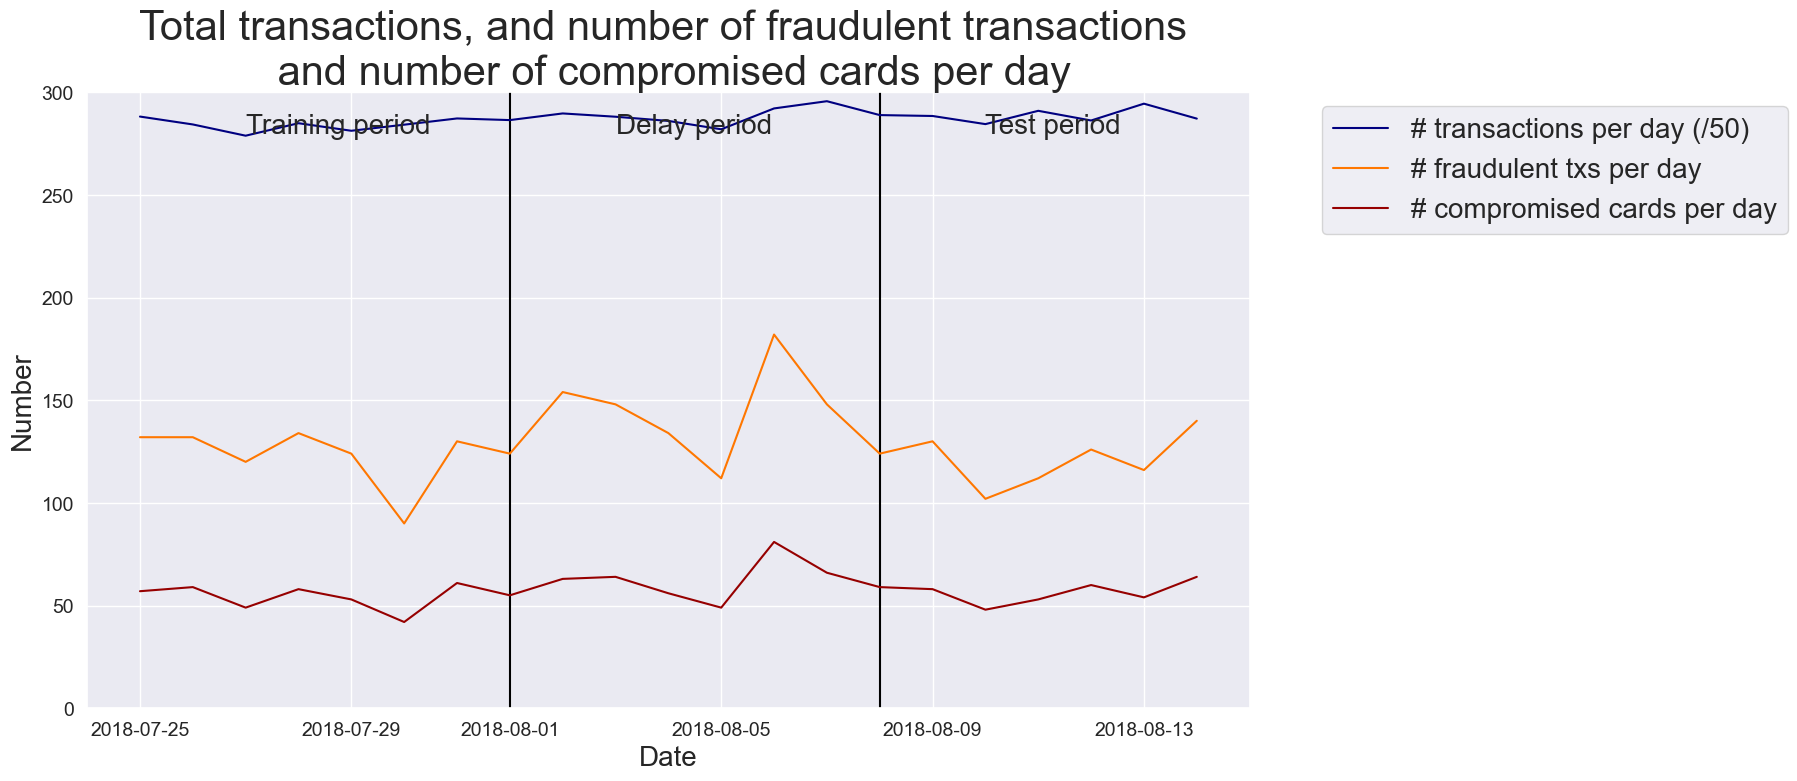

In [599]:
fraud_and_transactions_stats_fig

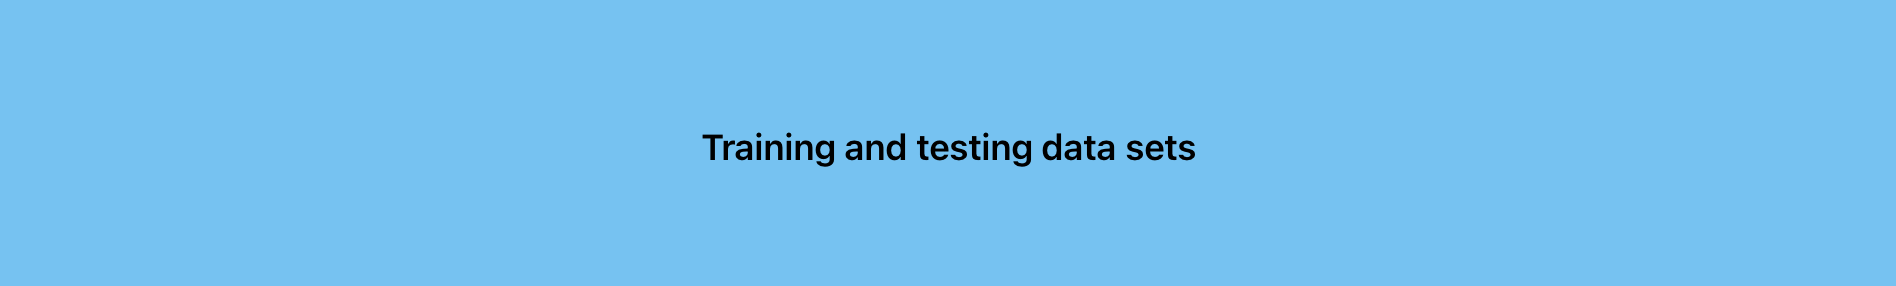

In [603]:
#purpose: training model is the input into the code to build the model while test set is what is used to determine it is correct - just two different types of data that is used as input 
#parameters: transactions dataframe, training period start date, training period days, delay period days, test period days 
def get_train_test_set(transactions_df, start_date_training, train_days=7, delay_days=7, test_days=7):
    #creates a new dataframe that only includes rows of the og dataframe from starting date to last day of training period - aka this is the dataframe of the training set
    train_df = transactions_df[(transactions_df.TX_DATETIME >= start_date_training) & (transactions_df.TX_DATETIME < start_date_training + datetime.timedelta(days=train_days))]
    #initalizes an empty list to store test set data 
    test_df = []
    #customers known to be compromised/fraudulent after delay period (aka known to be compromised and reported) are removed from test set so the test set is all predicted - mimicking real life where customer compromization isn't known before using the model
    #model's knowledge of fraud transactions is up to last test day except we have to subtract the delay day from it because that fraud transaction detected includes the delay so that means the actual date the model knows the last fraud transacitons of is before the date given

    #filters the fraud transactions in the training set and then gets the customer id of those transactions and stores it into a set
    known_defrauded_customers = set(train_df[train_df.TX_FRAUD == 1].CUSTOMER_ID)

    #sets the starting time of the training period to be the smallest time/lowest date from the the training dataframe 
    start_tx_time_days_training = train_df.TX_TIME_DAYS.min()

    #iterates over each day in the testing period
    for day in range(test_days):
        #adds the training start day (first date) to traning day period to delay day period to current day to get the date of the current day
        #creates data frame of the current day transaction data (doesn't classify fraud)
        test_df_day = transactions_df[transactions_df.TX_TIME_DAYS == start_tx_time_days_training + train_days + delay_days + day]
        #gets the current day accounting for the delay period of 1 and creates dataframe of transactions of that day
        test_df_delay_period = transactions_df[transactions_df.TX_TIME_DAYS == start_tx_time_days_training + train_days + day - 1]
        #gets the transactions that were fraud in the delay current day dataframe and gets the customer id's of those transactions and stores into a set (no duplicates)
        new_defrauded_customers = set(test_df_delay_period[test_df_delay_period.TX_FRAUD == 1].CUSTOMER_ID)
        #adds the new defrauded customers to this set 
        known_defrauded_customers = known_defrauded_customers.union(new_defrauded_customers)

        #creates a new dataframe of transactions but without the delay period transactions and without including transactions from already known defrauded customers
        test_df_day = test_df_day[~test_df_day.CUSTOMER_ID.isin(known_defrauded_customers)]

        #adds transactions of testing set (with no delay period complications from training set) into a list
        test_df.append(test_df_day)

    #turns all test_df of every day into single Dataframe
    test_df = pd.concat(test_df)

    #sorts dataframes by transaction id
    train_df = train_df.sort_values("TRANSACTION_ID")
    test_df = test_df.sort_values("TRANSACTION_ID")

    return (train_df, test_df)
        
        
    

    
    
    

In [604]:
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       train_days=7,delay_days=7,test_days=7)

In [605]:
train_df.shape

(99446, 24)

In [606]:
train_df[train_df.TX_FRAUD==1].shape

(862, 24)

test_df[test_df.TX_FRAUD==1].shape

In [608]:
#getting proporttion of fraud
385/58264

0.00660785390635727

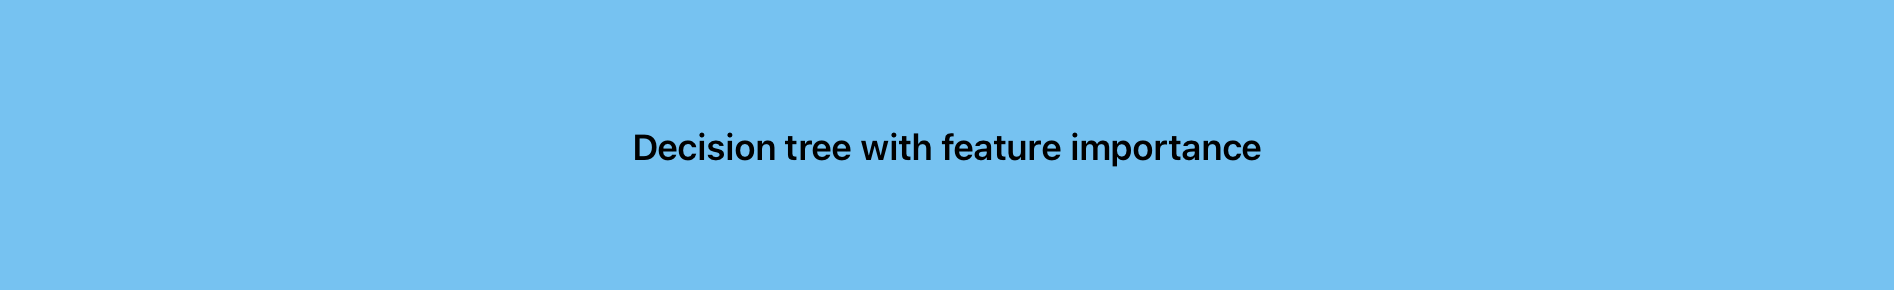

In [609]:
#the output of the prediction model will be the transaction label of whether it is fraud or not 
output_feature="TX_FRAUD"

#the input of the model is all the descriptions and characterizations
input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

In [610]:
#decision tree model that is trained from the training set and returns predictions for a test set and it's validity is checked by the test set itself
#prediction model is from sklearn library
#classifier is the type of machine learning model used - decision tree
#scale true means input data is scaled to fit the range
def fit_model_and_get_predictions(classifier, train_df, test_df, input_features, output_feature="TX_FRAUD", scale=True):
    if scale: #is true by default
        #scales the training and testing dataframe
        (train_df, test_df)=scaleData(train_df, test_df, input_features)
    
    #sets start time to current time
    start_time = time.time()
    #the chosen model is trained based on the training dataframes input and output featues 
    classifier.fit(train_df[input_features], train_df[output_feature])
    #tracks the time it takes to train the model/classifier
    training_execution_time = time.time() - start_time

    #sets start time to current time
    start_time = time.time()
    #gets the probability of fraud and non fraud of the test data but specifically extracts the second column aka it returns the probability of fraud specifically
    predictions_test = classifier.predict_proba(test_df[input_features])[:,1]
    #teacks time it takes for predictions test
    prediction_execution_time = time.time() - start_time

    #gets the probability of fraud of the training data - to further see how well the model performs 
    predictions_train = classifier.predict_proba(train_df[input_features])[:,1]

    #creates a dictionary of all the calculated data
    model_and_predictions_dictionary = {"classifier": classifier, "predictions_test": predictions_test, "predictions_train": predictions_train, "training_execution_time": training_execution_time, "prediction_execution_time": prediction_execution_time}
    
    return model_and_predictions_dictionary
    
    
    

In [637]:
#purpose: using feature importance in a decision tree model to see why the model marked the transactions as fraudulent 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score

#splits data
X_train, X_test, y_train, y_test = train_test_split(transactions_df[input_features], transactions_df[output_feature], random_state=42, test_size =0.2)

#scales data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#trains Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=16, random_state=8)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Getting feature importances
importances = model.feature_importances_

#features that are more immportant than threshold
threshold = 0.1
selected_features = [input_features[i] for i in range(len(importances)) if importances[i] > threshold]

#selected features are used 
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#trains model with selected features
model_selected = DecisionTreeClassifier(max_depth=16, random_state=8)
model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model trained with all features
y_pred_all_features = model.predict(X_test_scaled)

# Calculate the accuracy of the model with all features
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"Accuracy with all features: {accuracy_all_features}")

# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = model_selected.predict(X_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Accuracy with selected features: {accuracy_selected_features}")


Accuracy with all features: 0.9981092959615225
Accuracy with selected features: 0.998092710838378


In [ ]:
# We first create a decision tree object. We will limit its depth to 2 for interpretability, 
# and set the random state to zero for reproducibility
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                 input_features, output_feature,
                                                                 scale=False)

In [613]:
test_df['TX_FRAUD_PREDICTED']=model_and_predictions_dictionary['predictions_test']
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_FRUAD_SCENARIO,...,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
200444,924176,2018-08-08 00:00:30,4215,9460,61.32,11145630,129,0,0,0.0,...,81.570588,73.0,85.267397,2.0,0.0,16.0,0.0,60.0,0.0,0.002252
200445,924176,2018-08-08 00:00:30,4215,9460,61.32,11145630,129,0,0,0.0,...,80.445556,74.0,84.943784,2.0,0.0,16.0,0.0,60.0,0.0,0.002252
200446,924177,2018-08-08 00:03:45,28,8868,99.22,11145825,129,0,0,0.0,...,88.617500,70.0,88.410857,2.0,0.0,6.0,0.0,40.0,0.0,0.002252
200447,924177,2018-08-08 00:03:45,28,8868,99.22,11145825,129,0,0,0.0,...,88.156522,69.0,88.254203,2.0,0.0,6.0,0.0,40.0,0.0,0.002252
200448,924178,2018-08-08 00:08:16,3231,2954,16.77,11146096,129,0,0,0.0,...,16.299091,151.0,15.948411,2.0,0.0,12.0,0.0,56.0,0.0,0.002252


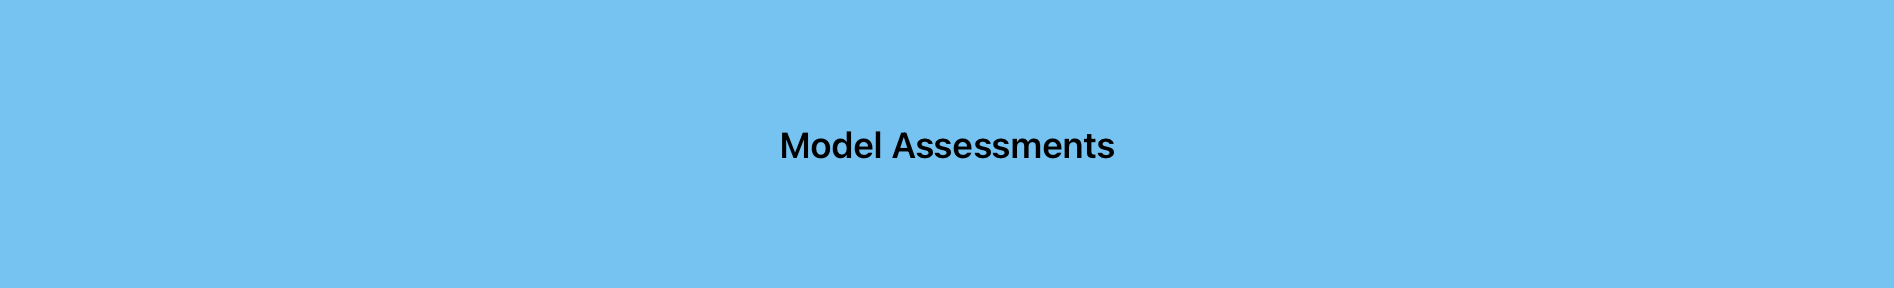

In [644]:
#purpose: evaluates the precision of the fraud detection model by seeing the ratio of correctly identified fraud cards/customers among top-k transactions in one day
#parameters: dataframe of transactions for one day and a number of the 
def card_precision_top_k_day(test_df_day, top_k):
    #groups the transactions of one day by customer id and the max for each column (predictions, tx_fraud, etc) are taken and then sorted by highest probabily of fraud to lowest and the index is reset
    df_day = test_df_day.groupby("CUSTOMER_ID").max().sort_values(by="predictions", ascending=False).reset_index(drop=False)

    #selects the top k rows of the dataframe aka only showing the "top_k" number of transactions
    df_day_top_k = df_day.head(top_k)

    #gets a list of all the customer id's that had the fraud transactions
    list_detected_compromised_cards = list(df_day_top_k[df_day_top_k.TX_FRAUD == 1].CUSTOMER_ID)

    #number of actual fraud customers divided by number of top-k predictions - the proportion/precision of accurate fraud customer detection
    card_precision_top_k = len(list_detected_compromised_cards) / top_k

    return list_detected_compromised_cards, card_precision_top_k

In [645]:
#purpose: evaluates the precision of the fraud detection model by seeing the ratio of correctly identified fraud cards/customers among top-k transactions in all days
#parametes: test data, with fraud preditions, max numner of customers to check each day, removal of previous detected fraud customers
def card_precision_top_k(predictions_df, top_k, remove_detected_compromised_cards=True):
    #creates a list of all the transaction days
    list_days = list(predictions_df["TX_TIME_DAYS"].unique())
    #sorts the days by ascending
    list_days.sort()
    #creates an empty list to store detected compromised customers 
    list_detected_compromised_cards = []
    #creates an empty list to store customer precision values per day
    card_precision_top_k_per_day_list = []
    #creates an empty list to store number of compromised cards detected per day
    nb_compromised_cards_per_day = []

    for day in list_days:
        #filters the dataframe to show the transactions on the specific day chosen
        df_day = predictions_df[predictions_df['TX_TIME_DAYS'] == day]
        #selects these columns for the chosen day
        df_day = df_day[["predictions", "CUSTOMER_ID", "TX_FRAUD"]]
        #only shows transactions of customers that aren't already detected as fraud
        df_day = df_day[df_day.CUSTOMER_ID.isin(list_detected_compromised_cards) == False]
        #counts the number of customers that had fraud transactions for the select day and adds the number to the list
        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD == 1].CUSTOMER_ID.unique()))
        #calls the card_precision_top_k_day function to get the detected fraud customers and the prediction precision
        detected_compromised_cards, card_precision_top_k = card_precision_top_k_day(df_day, top_k)
        #adds the precision of customer fraud detection per day to a list of the precision dates for all days
        card_precision_top_k_per_day_list.append(card_precision_top_k)

        if remove_detected_compromised_cards:
            #add the detected compromised cards for each day to the overall list of detected fraud customers
            list_detected_compromised_cards.extend(detected_compromised_cards)

    #gets the mean of the precision rate for all days
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()

    #returns the number of fraud customers per day for all days (list) and the list of customer fraud detection precision per day for all days and the mean customer precision of all days
    return nb_compromised_cards_per_day, card_precision_top_k_per_day_list, mean_card_precision_top_k
        
        
        





In [646]:
#purpose: assesses a fraud detection model through different precision metrics
#parameters: data frame of transactions with fraud predictions, model output feature, model prediction feature, max value of transactions selected, rounded setting to round to 3 decimal places
def performance_assessment(predictions_df, output_feature = "TX_FRAUD", prediction_feature="predictions", top_k_list=[100], rounded=True):
    #calculates the roc and auc score of the fraud predicitons - aka the ratio of corrently and incorrectly labeled fraud transactions and whether than model was randomly guessing or had bias - tldr: high score means the model had a good performance 
    AUC_ROC = metrics.roc_auc_score(predictions_df[output_feature], predictions_df[prediction_feature])
    #gets the ratio of correctly classified fraud transactions to total fraud transactions and with predicted - tldr: gets the precision performance - closer to 1 is better the precision of predictions
    AP = metrics.average_precision_score(predictions_df[output_feature], predictions_df[prediction_feature])
    #create a dataframe with one row of auc_roc and ap scores 
    performances = pd.DataFrame([[AUC_ROC, AP]], columns=['AUC ROC', 'Average precision'])

    for top_k in top_k_list:
        #calls the card_precision_top_k function but ignores hte first two returned values and only returns mean_card_precision_top_k
        _, _, mean_card_precision_top_k = card_precision_top_k(predictions_df, top_k)
        #adds the mean_card_precision_top_k to performances dataframe with new card precision column
        performances["Card precision!" + str(top_k)] = mean_card_precision_top_k

    if rounded:
        #rounds the numbers in the performances datadrame to 3 decimal places
        performances = performances.round(3)

    return performances 
                                
    

In [647]:
predictions_df=test_df
predictions_df['predictions']=model_and_predictions_dictionary['predictions_test']
    
performance_assessment(predictions_df, top_k_list=[100])

#AUC ROC: model is able to distinguish between fraud and non fraud transactions 80.8% of the time
#Average precision: precision of predictions is 44.9% - moderate
#Card Precision: 21.9% fraud detections accuracy - 22 out of 100 flagged customers are actually fraud 

,AUC ROC,Average precision,Card precision!100
0,0.819,0.508,0.209


In [648]:
#purpose: setting up a dictionary of classifiers and training each classifer and making predictions with these classifiers
#keys are the names of the different models and the values are instances of these models 
classifiers_dictionary={'Logistic regression':sklearn.linear_model.LogisticRegression(random_state=0), 
                        'Decision tree with depth of two':sklearn.tree.DecisionTreeClassifier(max_depth=2,random_state=0), 
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=0), 
                        'Random forest':sklearn.ensemble.RandomForestClassifier(random_state=0,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=0,n_jobs=-1),
                       }
#empty dictionary to store new models and their predictions 
fitted_models_and_predictions_dictionary={}

#for each different model in the dictionsary
for classifier_name in classifiers_dictionary:

    #trains/fits the model with training datafrae and then makes predictions on the test data
    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df, test_df, 
                                                                                  input_features=input_features,
                                                                                 output_feature=output_feature)
   #adds the model and its predictions to dictionary with key as the classifier/model name                                                                             output_feature=output_feature)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

In [649]:
#purpose: compares different models that can predict/detect fraud transactions and compares the performance of these models 
import pandas as pd

# parameters: dictionary of fitted models and its predictions, dataframe of transactions data, type of data set used, the number of transactions looked at   
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary, transactions_df, type_set="test", top_k_list=[100]):
    
    # empty list to store performance measurements for each classifier/model
    performances_list = []

    # looping a dictionary so it loops over the key (classifier) and value (predictions)
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
        # makes a copy of the transactions dataframe
        predictions_df = transactions_df.copy()
        # adds column predictions to predictions df and gets the predictions from the specific classifier and dataset type (type_set)
        predictions_df['predictions'] = model_and_predictions['predictions_' + type_set]
        # calls the performance assessment function on each model 
        performances_model = performance_assessment(predictions_df, output_feature="TX_FRAUD", prediction_feature="predictions", top_k_list=top_k_list)
        # sets the index of the performance model as the classifier name
        performances_model.index = [classifier_name]
        # makes a list of the performances data 
        performances_list.append(performances_model)

    # concatenate all the performance models into a single DataFrame
    performances = pd.concat(performances_list)

    return performances

In [650]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df, 
                                                        type_set='test', 
                                                        top_k_list=[100])
df_performances


,AUC ROC,Average precision,Card precision!100
Logistic regression,0.796,0.509,0.206
Decision tree with depth of two,0.819,0.508,0.209
Decision tree - unlimited depth,0.823,0.368,0.214
Random forest,0.864,0.673,0.230
XGBoost,0.871,0.647,0.227


In [651]:
# performances on training set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, train_df, 
                                                        type_set='train', 
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card precision!100
Logistic regression,0.880,0.616,0.294
Decision tree with depth of two,0.871,0.650,0.291
Decision tree - unlimited depth,1.000,1.000,0.423
Random forest,1.000,1.000,0.423
XGBoost,1.000,1.000,0.423


In [652]:
#purpose: calculates execution time of training and prediction phases of different classifiers/models
#parameter: dictionary with the classifier names and its information/predictions 
def execution_times_model_collection(fitted_models_and_predictions_dictionary):

    execution_times_list = []
    
    #makes an empty dataframe to later hold execution times for trainin the classifer and time it takes to predict 
    execution_times = pd.DataFrame()

    #loops over the values in the dictionary
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
        #creates a new empty dataframe to store execution times of current classifer in the loop
        execution_times_model = pd.DataFrame()

        #creates new column in model and sets the values of the model as the training execution time of the specified classifier
        execution_times_model['Training execution time'] = [model_and_predictions['training_execution_time']]
         #creates new column in model and sets the values of the model as the prediction execution time of the specified classifier
        execution_times_model["Prediction execution time"] = [model_and_predictions["prediction_execution_time"]]

        #sets the index as the classifer name
        execution_times_model.index = [classifier_name]
        #appends the dataframe of the specific classifier to the general dataframe of all classifiers
        execution_times_list.append(execution_times_model)
        
    execution_times = pd.concat(execution_times_list)
    return execution_times

In [653]:
# Execution times
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic regression,0.120359,0.006319
Decision tree with depth of two,0.129685,0.005519
Decision tree - unlimited depth,1.017976,0.008105
Random forest,1.778164,0.072117
XGBoost,0.257040,0.026197
